# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from google.colab import files
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, learning_curve, StratifiedKFold

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [23]:
# Upload file dari lokal
uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['hasil_clustering.csv']))

# Melihat data
df.head()


Saving hasil_clustering.csv to hasil_clustering.csv


,provinsi,daerah,jenis,tahun,peng,peng_log,Cluster
0,ACEH,PERDESAAN,MAKANAN,2007,195176.0,12.181662,0
1,ACEH,PERDESAAN,MAKANAN,2008,218781.0,12.295831,0
2,ACEH,PERDESAAN,MAKANAN,2009,247427.0,12.418875,0
3,ACEH,PERDESAAN,MAKANAN,2010,275749.0,12.527250,0
4,ACEH,PERDESAAN,MAKANAN,2011,308000.0,12.637858,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4512 entries, 0 to 4511
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4512 non-null   object 
 1   daerah    4512 non-null   object 
 2   jenis     4512 non-null   object 
 3   tahun     4512 non-null   int64  
 4   peng      4512 non-null   float64
 5   peng_log  4512 non-null   float64
 6   Cluster   4512 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 246.9+ KB


In [25]:
print("Unique values in Cluster:", df['Cluster'].nunique())
print(df['Cluster'].value_counts())


Unique values in Cluster: 4
Cluster
2    1442
3    1290
0    1107
1     673
Name: count, dtype: int64


In [26]:
# Pilih fitur
features = ['peng', 'tahun', 'peng_log']
X = df[features]
y = df['Cluster']

# Split train-test (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Split train-test (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (3158, 3)
Test shape: (1354, 3)
Train shape: (3609, 3)
Test shape: (903, 3)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [27]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection
selector = SelectKBest(f_classif, k='all')  # Bisa dikurangi jika ada banyak fitur
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Inisialisasi model dengan parameter tambahan untuk mengurangi overfitting
logreg_model = LogisticRegression(C=1.0, max_iter=1000, solver='lbfgs', class_weight='balanced', random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=15, weights='uniform')

# Training model
logreg_model.fit(X_train_selected, y_train)
knn_model.fit(X_train_selected, y_train)

print("Model Logistic Regression dan KNN sudah dilatih.")


Model Logistic Regression dan KNN sudah dilatih.


Saya menggunakan algoritma Logistic Regression dan K-Nearest Neighbors (KNN) untuk klasifikasi. Logistic Regression merupakan model yang sederhana namun efektif, terutama untuk data yang terdistribusi secara linear. Sementara itu, KNN merupakan algoritma non-parametrik yang bekerja dengan cara membandingkan kedekatan data, namun dapat berjalan lambat jika jumlah datanya besar dan rentan terhadap overfitting jika parameternya tidak dipilih dengan baik.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

 Logistic Regression 
Training Accuracy: 0.9927957883070102
Test Accuracy: 0.9933554817275747
Training F1-Score: 0.9928073208730203
Test F1-Score: 0.9933859202562612
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       0.96      1.00      0.98       135
           2       1.00      0.99      1.00       289
           3       1.00      0.98      0.99       258

    accuracy                           0.99       903
   macro avg       0.99      0.99      0.99       903
weighted avg       0.99      0.99      0.99       903



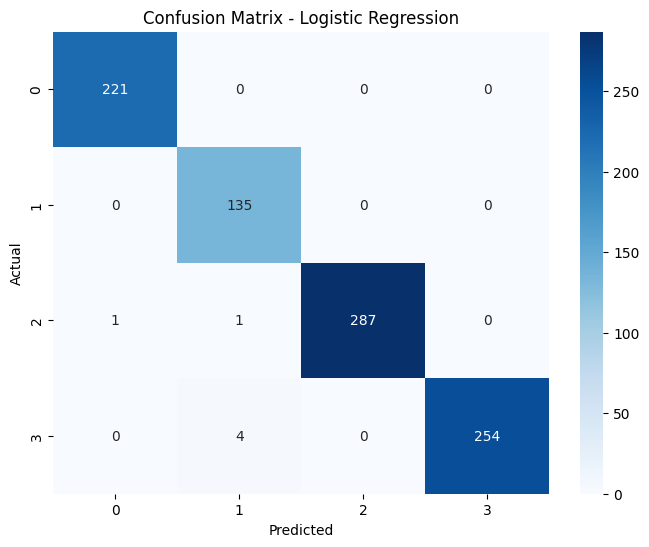

KNN 
Training Accuracy: 0.9952895538930452
Test Accuracy: 0.9955703211517165
Training F1-Score: 0.9952850455468272
Test F1-Score: 0.9955721149499321
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       0.99      0.99      0.99       135
           2       0.99      1.00      0.99       289
           3       1.00      1.00      1.00       258

    accuracy                           1.00       903
   macro avg       0.99      0.99      0.99       903
weighted avg       1.00      1.00      1.00       903



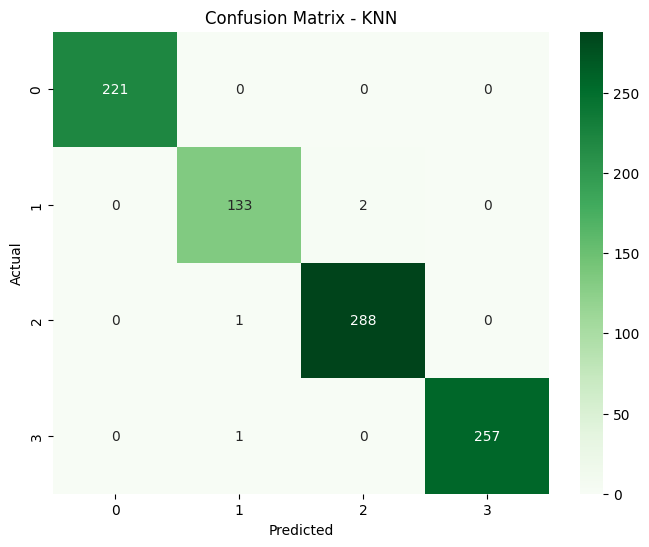

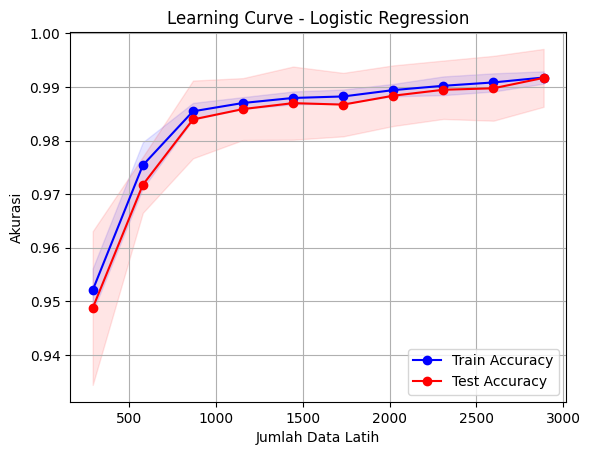

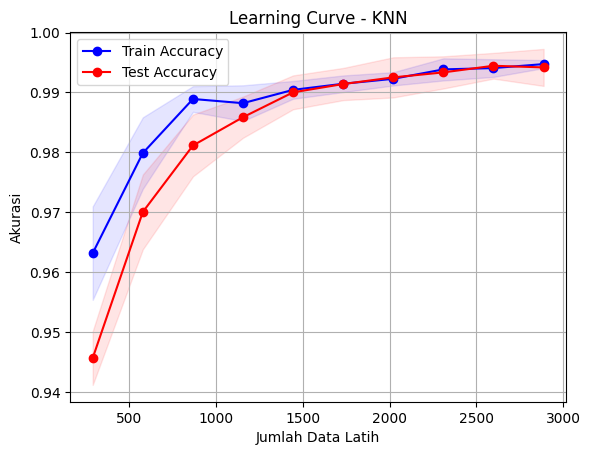

Ringkasan Evaluasi Model:
Logistic Regression - Train Accuracy: 0.9928, Test Accuracy: 0.9934, Train F1-Score: 0.9928, Test F1-Score: 0.9934
KNN - Train Accuracy: 0.9953, Test Accuracy: 0.9956, Train F1-Score: 0.9953, Test F1-Score: 0.9956


In [28]:
# Prediksi dengan data uji
y_pred_logreg_train = logreg_model.predict(X_train_selected)
y_pred_logreg_test = logreg_model.predict(X_test_selected)
y_pred_knn_train = knn_model.predict(X_train_selected)
y_pred_knn_test = knn_model.predict(X_test_selected)

# Evaluasi Logistic Regression
print(" Logistic Regression ")
logreg_train_accuracy = accuracy_score(y_train, y_pred_logreg_train)
logreg_test_accuracy = accuracy_score(y_test, y_pred_logreg_test)
logreg_train_f1 = f1_score(y_train, y_pred_logreg_train, average='weighted')
logreg_test_f1 = f1_score(y_test, y_pred_logreg_test, average='weighted')
print("Training Accuracy:", logreg_train_accuracy)
print("Test Accuracy:", logreg_test_accuracy)
print("Training F1-Score:", logreg_train_f1)
print("Test F1-Score:", logreg_test_f1)
print(classification_report(y_test, y_pred_logreg_test))

# Confusion Matrix Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg_test), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Evaluasi KNN
print("KNN ")
knn_train_accuracy = accuracy_score(y_train, y_pred_knn_train)
knn_test_accuracy = accuracy_score(y_test, y_pred_knn_test)
knn_train_f1 = f1_score(y_train, y_pred_knn_train, average='weighted')
knn_test_f1 = f1_score(y_test, y_pred_knn_test, average='weighted')
print("Training Accuracy:", knn_train_accuracy)
print("Test Accuracy:", knn_test_accuracy)
print("Training F1-Score:", knn_train_f1)
print("Test F1-Score:", knn_test_f1)
print(classification_report(y_test, y_pred_knn_test))

# Confusion Matrix KNN
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Learning Curve
def plot_learning_curve(model, X, y, title):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Train Accuracy")
    plt.plot(train_sizes, test_mean, 'o-', color="red", label="Test Accuracy")

    plt.fill_between(train_sizes, train_mean - np.std(train_scores, axis=1),
                     train_mean + np.std(train_scores, axis=1), alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_mean - np.std(test_scores, axis=1),
                     test_mean + np.std(test_scores, axis=1), alpha=0.1, color="red")

    plt.title(title)
    plt.xlabel("Jumlah Data Latih")
    plt.ylabel("Akurasi")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot learning curve untuk Logistic Regression
plot_learning_curve(logreg_model, X_train_selected, y_train, "Learning Curve - Logistic Regression")

# Plot learning curve untuk KNN
plot_learning_curve(knn_model, X_train_selected, y_train, "Learning Curve - KNN")

# Menampilkan hasil evaluasi secara ringkas
print("Ringkasan Evaluasi Model:")
print(f"Logistic Regression - Train Accuracy: {logreg_train_accuracy:.4f}, Test Accuracy: {logreg_test_accuracy:.4f}, Train F1-Score: {logreg_train_f1:.4f}, Test F1-Score: {logreg_test_f1:.4f}")
print(f"KNN - Train Accuracy: {knn_train_accuracy:.4f}, Test Accuracy: {knn_test_accuracy:.4f}, Train F1-Score: {knn_train_f1:.4f}, Test F1-Score: {knn_test_f1:.4f}")

**1. Logistic Regression**

Akurasi: 99.34%

F1-Score : 99.34%

Analisis: Model mampu mengklasifikasikan hampir semua kelas dengan sangat baik, dengan rata-rata precision, recall, dan F1-score di atas 0.98. Tidak ada indikasi overfitting, karena akurasi training dan testing hampir sama. Model ini stabil dan cepat dalam prediksi, menjadikannya pilihan yang efisien untuk implementasi.

**2. K-Nearest Neighbors (KNN)**

Akurasi: 99,56%

F1-Score: 99,56%

Analisis: Model memiliki kinerja yang sangat tinggi, dengan presisi, perolehan kembali, dan skor F1 mendekati 1,00 di semua kelas. Sebelum penyetelan, KNN mengalami overfitting karena model melakukan overfitting pada data pelatihan. Penyetelan parameter (n_neighbors=15, Pembobotan Seragam) berhasil mengurangi overfitting, sehingga akurasi pengujian mendekati akurasi pelatihan.

**Perbandingan Regresi Logistik vs. KNN**

Kedua model memiliki performa yang sangat baik dalam klasifikasi, tetapi ada beberapa perbedaan penting. Dalam hal akurasi, KNN sedikit lebih unggul daripada Regresi Logistik. Namun, KNN memerlukan penyetelan parameter untuk menghindari overfitting, sementara Regresi Logistik sudah memiliki keseimbangan yang baik sejak awal tanpa banyak penyesuaian. Dalam hal efisiensi, Regresi Logistik lebih cepat dalam proses inferensi, sementara KNN membutuhkan waktu lebih lama karena harus menghitung jarak antara sampel dalam setiap prediksi. Dengan demikian, pilihan model bergantung pada kebutuhan: jika akurasi maksimum menjadi prioritas, KNN dapat menjadi pilihan yang lebih baik, tetapi jika efisiensi dan kecepatan lebih penting, Regresi Logistik lebih unggul.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

Tuning untuk LogisticRegression

*   GridSearch
*   RandomSearch



In [29]:
#Tuning grid seacrh dengan LogisticRegression
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [500, 1000, 2000]
}

grid_search_logreg = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42),
                                  param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_logreg.fit(X_train_selected, y_train)

best_logreg_grid = grid_search_logreg.best_estimator_
print("Best Logistic Regression (GridSearchCV):", grid_search_logreg.best_params_)

#Tuning random search dengan LogisticRegression
param_dist_logreg = {
    'C': np.logspace(-3, 2, 10),
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [500, 1000, 2000]
}

random_search_logreg = RandomizedSearchCV(LogisticRegression(class_weight='balanced', random_state=42),
                                          param_dist_logreg, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_logreg.fit(X_train_selected, y_train)

best_logreg_random = random_search_logreg.best_estimator_
print("Best Logistic Regression (RandomizedSearchCV):", random_search_logreg.best_params_)



Best Logistic Regression (GridSearchCV): {'C': 100, 'max_iter': 500, 'solver': 'lbfgs'}
Best Logistic Regression (RandomizedSearchCV): {'solver': 'lbfgs', 'max_iter': 500, 'C': np.float64(100.0)}


Tuning untuk KNN :

*   GridSearch
*   RandomSearch



In [32]:
# Tuning Grid Search dengan KNN
param_grid_knn = {
    'n_neighbors': range(10, 100, 5),
    'weights': ['uniform'],
    'p': [1,2]
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_selected, y_train)

best_knn_grid = grid_search_knn.best_estimator_
print("Best KNN (GridSearchCV):", grid_search_knn.best_params_)

# Tuning Random Search dengan KNN
param_dist_knn = {
    'n_neighbors': range(10, 100, 5),
    'weights': ['uniform'],
    'p': [1,2]
}

random_search_knn = RandomizedSearchCV(KNeighborsClassifier(),
                                       param_dist_knn, n_iter=15, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_knn.fit(X_train_selected, y_train)

best_knn_random = random_search_knn.best_estimator_
print("Best KNN (RandomizedSearchCV):", random_search_knn.best_params_)


Best KNN (GridSearchCV): {'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}
Best KNN (RandomizedSearchCV): {'weights': 'uniform', 'p': 1, 'n_neighbors': 10}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Logistic Regression
Train Accuracy: 0.9986, Test Accuracy: 0.9967
Train F1-Score: 0.9986, Test F1-Score: 0.9967
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       0.98      1.00      0.99       135
           2       1.00      1.00      1.00       289
           3       1.00      0.99      0.99       258

    accuracy                           1.00       903
   macro avg       0.99      1.00      1.00       903
weighted avg       1.00      1.00      1.00       903



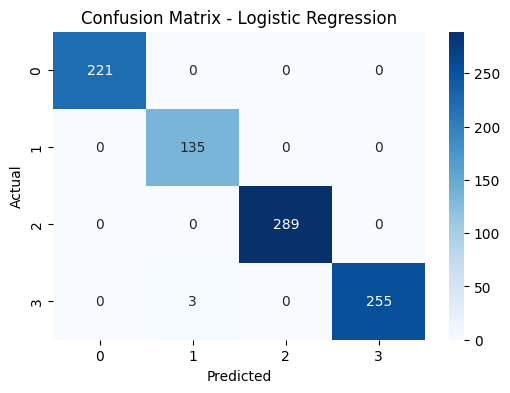

KNN
Train Accuracy: 0.9953, Test Accuracy: 0.9945
Train F1-Score: 0.9953, Test F1-Score: 0.9945
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       0.98      0.99      0.99       135
           2       1.00      0.99      0.99       289
           3       1.00      0.99      1.00       258

    accuracy                           0.99       903
   macro avg       0.99      0.99      0.99       903
weighted avg       0.99      0.99      0.99       903



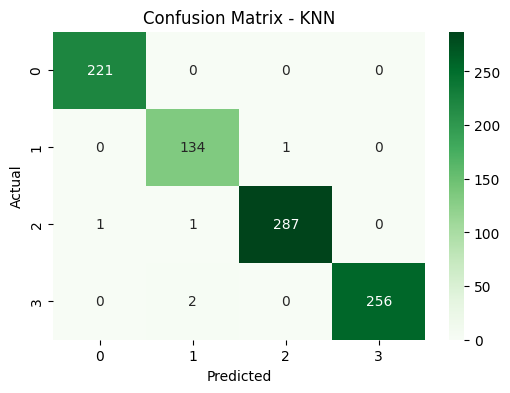

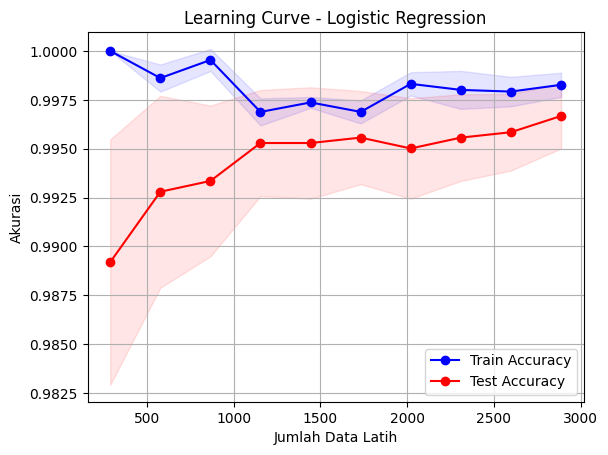

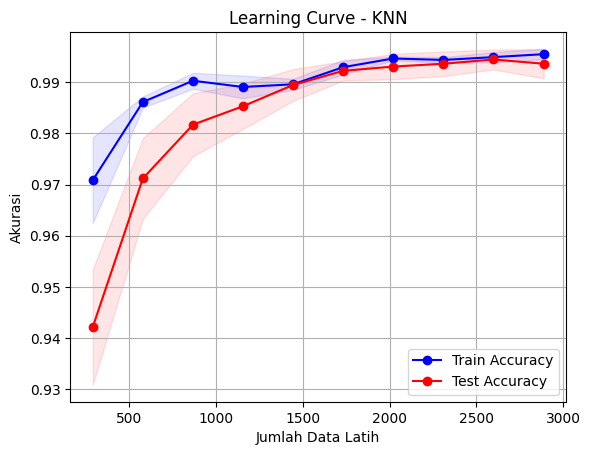


RINGKASAN HASIL
Logistic Regression - Train Acc: 0.9986, Test Acc: 0.9967
Logistic Regression - Train F1: 0.9986, Test F1: 0.9967
KNN - Train Acc: 0.9953, Test Acc: 0.9945
KNN - Train F1: 0.9953, Test F1: 0.9945


In [33]:
# Pilih model terbaik dari GridSearchCV atau RandomizedSearchCV
best_logreg = best_logreg_grid
best_knn = best_knn_grid

# Evaluasi Logistic Regression
y_pred_logreg_train = best_logreg.predict(X_train_selected)
y_pred_logreg_test = best_logreg.predict(X_test_selected)

logreg_train_acc = accuracy_score(y_train, y_pred_logreg_train)
logreg_test_acc = accuracy_score(y_test, y_pred_logreg_test)
logreg_train_f1 = f1_score(y_train, y_pred_logreg_train, average='weighted')
logreg_test_f1 = f1_score(y_test, y_pred_logreg_test, average='weighted')

print("Logistic Regression")
print(f"Train Accuracy: {logreg_train_acc:.4f}, Test Accuracy: {logreg_test_acc:.4f}")
print(f"Train F1-Score: {logreg_train_f1:.4f}, Test F1-Score: {logreg_test_f1:.4f}")
print(classification_report(y_test, y_pred_logreg_test))

# Confusion Matrix Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg_test), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Evaluasi KNN
y_pred_knn_train = best_knn.predict(X_train_selected)
y_pred_knn_test = best_knn.predict(X_test_selected)

knn_train_acc = accuracy_score(y_train, y_pred_knn_train)
knn_test_acc = accuracy_score(y_test, y_pred_knn_test)
knn_train_f1 = f1_score(y_train, y_pred_knn_train, average='weighted')
knn_test_f1 = f1_score(y_test, y_pred_knn_test, average='weighted')

print("KNN")
print(f"Train Accuracy: {knn_train_acc:.4f}, Test Accuracy: {knn_test_acc:.4f}")
print(f"Train F1-Score: {knn_train_f1:.4f}, Test F1-Score: {knn_test_f1:.4f}")
print(classification_report(y_test, y_pred_knn_test))

# Confusion Matrix KNN
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Learning Curve
def plot_learning_curve(model, X, y, title):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Train Accuracy")
    plt.plot(train_sizes, test_mean, 'o-', color="red", label="Test Accuracy")

    plt.fill_between(train_sizes, train_mean - np.std(train_scores, axis=1),
                     train_mean + np.std(train_scores, axis=1), alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_mean - np.std(test_scores, axis=1),
                     test_mean + np.std(test_scores, axis=1), alpha=0.1, color="red")

    plt.title(title)
    plt.xlabel("Jumlah Data Latih")
    plt.ylabel("Akurasi")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot Learning Curve setelah tuning
plot_learning_curve(best_logreg, X_train_selected, y_train, "Learning Curve - Logistic Regression")
plot_learning_curve(best_knn, X_train_selected, y_train, "Learning Curve - KNN")

# RINGKASAN HASIL
print("\nRINGKASAN HASIL")
print(f"Logistic Regression - Train Acc: {logreg_train_acc:.4f}, Test Acc: {logreg_test_acc:.4f}")
print(f"Logistic Regression - Train F1: {logreg_train_f1:.4f}, Test F1: {logreg_test_f1:.4f}")
print(f"KNN - Train Acc: {knn_train_acc:.4f}, Test Acc: {knn_test_acc:.4f}")
print(f"KNN - Train F1: {knn_train_f1:.4f}, Test F1: {knn_test_f1:.4f}")

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

**Perbandingan hasil evaluasi sebelum dan sesudah tuning:**

**1. Logistic Regression:**

Sebelum tuning, model memiliki akurasi 0,9928 pada data pelatihan dan 0,9934 pada data pengujian, dengan F1-score yang sama. Setelah penyetelan, akurasi meningkat menjadi 0,9986 pada data pelatihan dan 0,9967 pada data pengujian. F1-score juga meningkat seiring dengan akurasi, yang menunjukkan bahwa model menjadi lebih stabil dan tepat dalam mengklasifikasikan tanpa indikasi overfitting.

**2.KNN:**

Sebelum tuning, model memiliki akurasi 0,9953 selama pelatihan dan 0,9956 selama pengujian, dengan F1-score yang sama. Meskipun perbedaan antara akurasi pelatihan dan pengujian kecil, ada potensi overfitting karena model bergantung pada jumlah tetangga yang rendah. Setelah tuning menggunakan GridSearchCV dan RandomizedSearchCV, di mana parameter n_neighbors ditingkatkan dalam kisaran 10 hingga 100 dengan interval 5, menggunakan Weights='uniform', dan mencoba p-value = {1,2}, overfitting berkurang. Akurasi pengujian sedikit menurun menjadi 0,9945, sedangkan akurasi pelatihan tetap pada 0,9953, yang menunjukkan bahwa penyetelan berhasil mengurangi ketergantungan model pada data pelatihan.

**Identifikasi kelemahan Model:**

Meskipun Regresi Logistik menunjukkan peningkatan akurasi setelah penyetelan, model ini masih memiliki keterbatasan dalam menangani pola non-linier yang lebih kompleks. Sementara itu, KNN sangat bergantung pada jumlah parameter tetangga (n_neighbors), sehingga memilih nilai yang tidak tepat dapat menyebabkan kinerja menurun saat menghadapi data baru.

**Saran Tindakan Lebih Lanjut**:

* Tingkatkan varians data atau terapkan augmentasi data untuk menghindari bias dalam klasifikasi.

* Uji model lain, seperti Support Vector Machine (SVM), Random Forest, atau Gradient Boosting, untuk membandingkan kinerja dengan Logistic Regression dan KNN.

* Eksperimen lebih lanjut pada KNN, seperti menggunakan Weights='distance' untuk mengurangi dampak data yang jauh atau mengalirkan ulang pemilihan n_neighbors untuk mencapai keseimbangan optimal antara bias dan varians.